## Realizado por est: Edward Uriarte

# Reconocimiento de numeros dibujados

Importar librerias

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Cargar datos mnist

In [2]:
# Cargar el conjunto de datos de MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Normalizar datos

In [3]:
# Normalizar los datos
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convertir las etiquetas en categorías binarias
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Crear el modelo

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

Compilar el modelo

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Entrenar el modelo

In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2440 - accuracy: 0.9283 - val_loss: 0.1275 - val_accuracy: 0.9621
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1053 - accuracy: 0.9676 - val_loss: 0.1046 - val_accuracy: 0.9674
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.0976 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9822 - val_loss: 0.0848 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0753 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.0864 - val_accuracy: 0.9727
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0295 - accuracy: 0.9900 - val_loss: 0.1032 - val_accuracy:

Graficar la pérdida y la precisión durante el entrenamiento

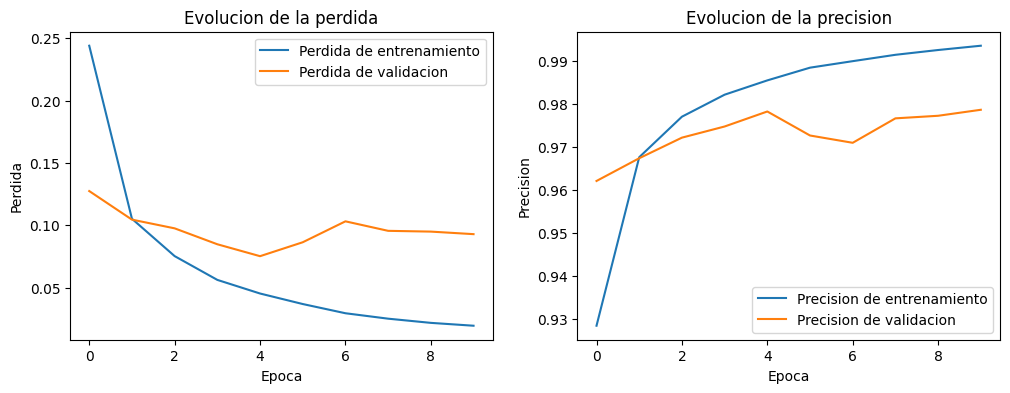

In [10]:
# Graficar la perdida y la precision durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida de validacion')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.legend()
plt.title('Evolucion de la perdida')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precision de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precision de validacion')
plt.xlabel('Epoca')
plt.ylabel('Precision')
plt.legend()
plt.title('Evolucion de la precision')
plt.show()


Evaluar el modelo en el conjunto de prueba

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.2f}')

313/313 [==============================] - 0s 1ms/step - loss: 0.0929 - accuracy: 0.9787
Precisión en el conjunto de prueba: 0.98


Mostrar algunas predicciones

313/313 [==============================] - 0s 1ms/step


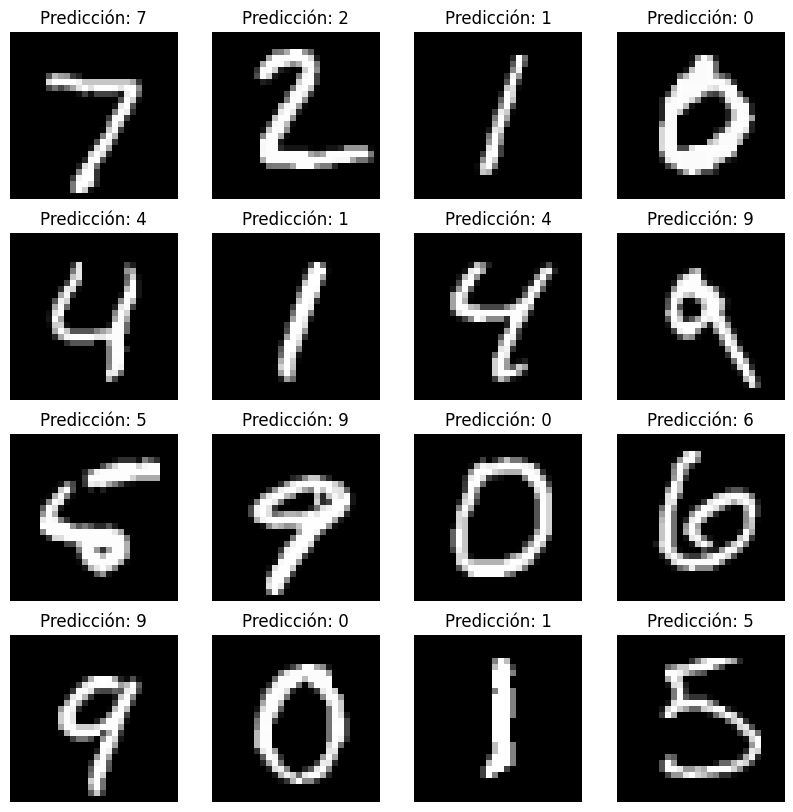

In [9]:
predictions = model.predict(X_test)
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicción: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()